<a href="https://colab.research.google.com/github/BillyNoyes/StockPricePredictorPy/blob/master/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Import libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [98]:
#Get the stock quote
df = web.DataReader('TSLA', data_source='yahoo', start='2012-01-01', end='2020-04-24')
#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,29.500000,27.650000,28.940001,28.080000,928100,28.080000
2012-01-04,28.670000,27.500000,28.209999,27.709999,630100,27.709999
2012-01-05,27.930000,26.850000,27.760000,27.120001,1005500,27.120001
2012-01-06,27.790001,26.410000,27.200001,26.910000,986300,26.910000
2012-01-09,27.490000,26.120001,27.000000,27.250000,897000,27.250000
...,...,...,...,...,...,...
2020-04-17,774.950012,747.659973,772.280029,753.890015,13128200,753.890015
2020-04-20,765.570007,712.210022,732.700012,746.359985,14746600,746.359985
2020-04-21,753.330017,673.789978,730.119995,686.719971,20209100,686.719971


In [99]:
#Get the number of rows and columns in the data set
df.shape

(2090, 6)

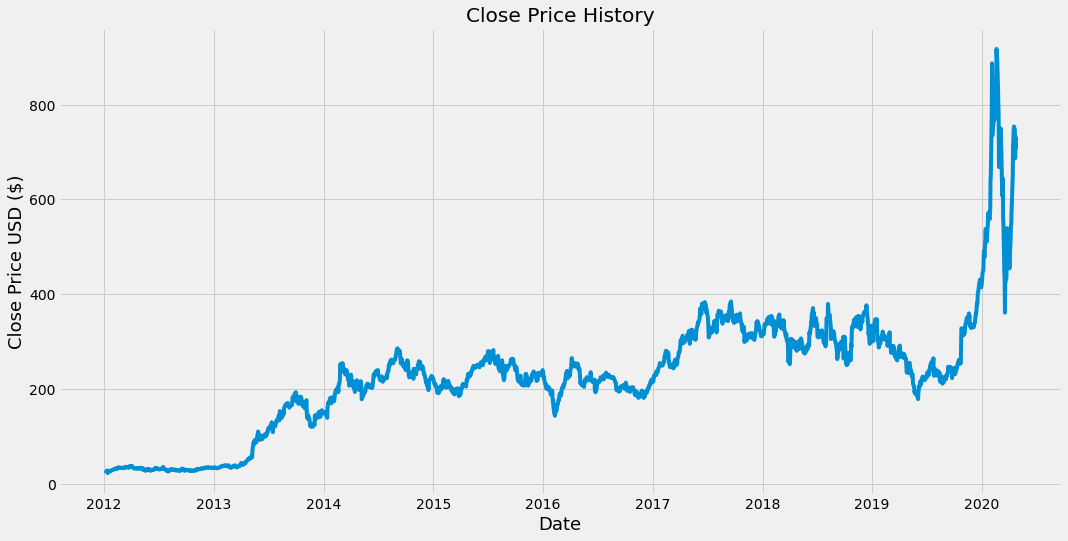

In [100]:
#Visualise closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [101]:
#Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
#Convert dataframe to a numpy array
dataset = data.values
#Get number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

1672

In [102]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00591306],
       [0.00549948],
       [0.00483999],
       ...,
       [0.74212801],
       [0.79286409],
       [0.76326528]])

In [103]:
#Create training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.00591306, 0.00549948, 0.00483999, 0.00460525, 0.0049853 ,
       0.00539888, 0.00608072, 0.00610308, 0.        , 0.00425874,
       0.00449348, 0.00443759, 0.00425874, 0.00444877, 0.00517532,
       0.0057901 , 0.00687435, 0.00731028, 0.00757855, 0.00701966,
       0.00758973, 0.00833864, 0.00934464, 0.0100712 , 0.00984765,
       0.01021651, 0.01094307, 0.00928876, 0.00972469, 0.01160256,
       0.01208321, 0.01273152, 0.01361457, 0.01308921, 0.01277623,
       0.01312274, 0.01225087, 0.01210556, 0.01231794, 0.01187083,
       0.01298861, 0.01257503, 0.01227323, 0.0115355 , 0.01154667,
       0.01149078, 0.01335748, 0.01477706, 0.01486648, 0.01397226,
       0.0136481 , 0.01400579, 0.01362574, 0.01360339, 0.01381577,
       0.01297743, 0.01261974, 0.01633077, 0.01693437, 0.01683377])]
[0.016252530328918307]



In [0]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [105]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1612, 60, 1)

In [0]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [108]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1612/1612 [==============================] - 55s 34ms/step - loss: 5.0452e-04


In [0]:
#Create the testing data set
#Create a new array containing scaled values from index 1612 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
  

In [0]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [0]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [0]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [0]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


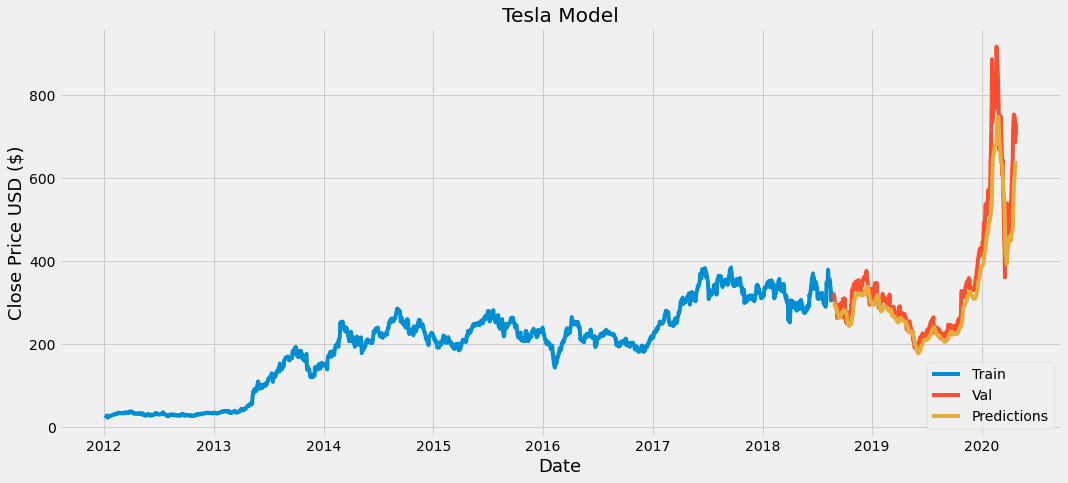

In [114]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualise the data
plt.figure(figsize=(16,7))
plt.title('Tesla Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [115]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-08-24,322.820007,299.843567
2018-08-27,319.269989,298.583740
2018-08-28,311.859985,297.749359
2018-08-29,305.010010,296.426483
2018-08-30,303.149994,294.269958
...,...,...
2020-04-17,753.890015,587.257996
2020-04-20,746.359985,613.219788
2020-04-21,686.719971,632.365051


In [116]:
#Get the quote
tesla_quote = web.DataReader('TSLA', data_source='yahoo', start='2012-01-01', end='2020-04-24')
#Create a new dataframe
new_df = tesla_quote.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[641.01306]]


In [119]:
#Get the quote
tesla_quote2 = web.DataReader('TSLA', data_source='yahoo', start='2020-04-24', end='2020-04-24')
print(tesla_quote2['Close'])

Date
2020-04-23    705.630005
Name: Close, dtype: float64
